In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel

import warnings                               
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('./data/beer.csv',index_col=0, parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])
split = pd.to_datetime('2015-11-30')
train = df[df['Date'] <= split]
test = df[df['Date'] > split]
train = train.set_index('Date')
test = test.set_index('Date')

In [78]:
model_1 = ExponentialSmoothing(train['Beer_Consumption'], trend="add", seasonal="add", seasonal_periods=12, damped_trend=False).fit()
model_2 = ExponentialSmoothing(train['Beer_Consumption'], trend="mul", seasonal="add", seasonal_periods=12, damped_trend=True).fit()
model_3 = ExponentialSmoothing(train['Beer_Consumption'], trend="add", seasonal="mul", seasonal_periods=12, damped_trend=True).fit()
model_4 = ExponentialSmoothing(train['Beer_Consumption'], trend="mul", seasonal="mul", seasonal_periods=12, damped_trend=True).fit()

In [79]:
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
pred_2 = pd.DataFrame(model_2.forecast(len(test)))
pred_3 = pd.DataFrame(model_3.forecast(len(test)))
pred_4 = pd.DataFrame(model_4.forecast(len(test)))

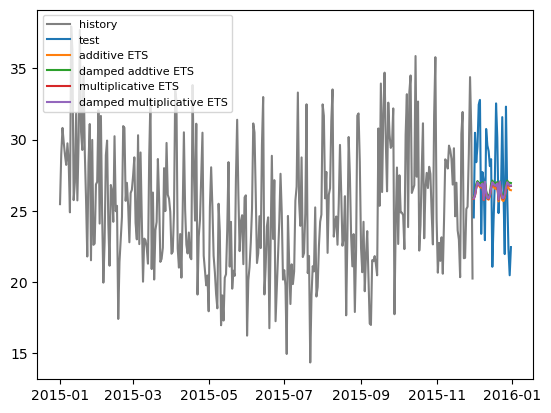

In [80]:
plt.plot(train['Beer_Consumption'], label='history', color='grey')
plt.plot(test['Beer_Consumption'], label='test')
plt.plot(pred_1, label='additive ETS')
plt.plot(pred_2, label='damped addtive ETS')
plt.plot(pred_3, label='multiplicative ETS')
plt.plot(pred_4, label='damped multiplicative ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

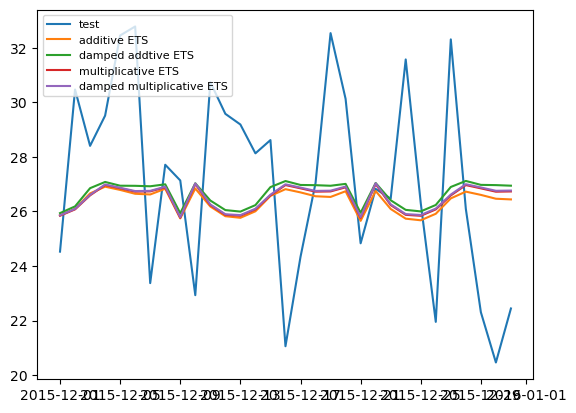

In [81]:
plt.plot(test['Beer_Consumption'], label='test')
plt.plot(pred_1, label='additive ETS')
plt.plot(pred_2, label='damped addtive ETS')
plt.plot(pred_3, label='multiplicative ETS')
plt.plot(pred_4, label='damped multiplicative ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [82]:
model1 = ThetaModel(train['Beer_Consumption']).fit()
model2 = ThetaModel(train['Beer_Consumption'], deseasonalize=False).fit()
model3 = ThetaModel(train['Beer_Consumption'], period=7, method='additive').fit()

pred1 = model1.forecast(len(test))
pred1 = pd.DataFrame(pred1.values, index=test.index)

pred2 = model2.forecast(len(test))
pred2 = pd.DataFrame(pred2.values, index=test.index)

pred3 = model3.forecast(len(test))
pred3 = pd.DataFrame(pred3.values, index=test.index)

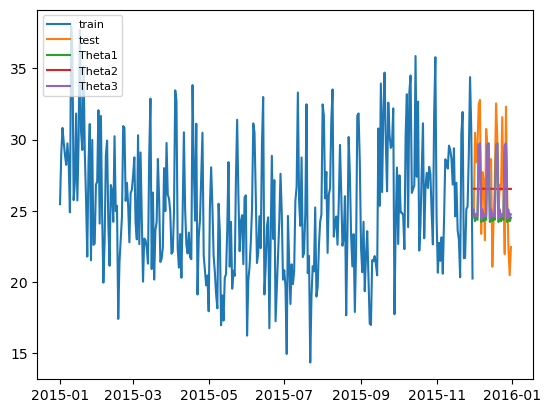

In [83]:
plt.plot(train['Beer_Consumption'], label='train')
plt.plot(test['Beer_Consumption'], label='test')
plt.plot(pred1[0], label='Theta1')
plt.plot(pred2[0], label='Theta2')
plt.plot(pred3[0], label='Theta3')
plt.legend(loc='upper left', fontsize=8)
plt.show()

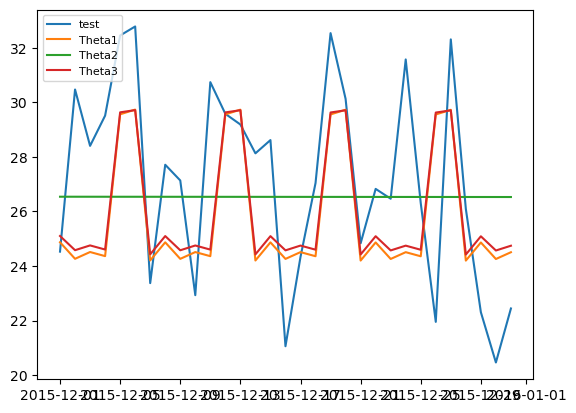

In [84]:
plt.plot(test['Beer_Consumption'], label='test')
plt.plot(pred1[0], label='Theta1')
plt.plot(pred2[0], label='Theta2')
plt.plot(pred3[0], label='Theta3')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [85]:
from prophet import Prophet

In [93]:
df = pd.read_csv('./data/beer.csv',index_col=0, parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds','a','b','y']
df.drop(['a','b'],axis=1, inplace=True)
split = pd.to_datetime('2015-11-30')
train = df[df['ds'] <= split]
test = df[df['ds'] > split]


In [108]:
#Prophet project
m = Prophet()

#Fit with default settings
m.fit(train)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=len(test))
#Forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:31:00 - cmdstanpy - INFO - Chain [1] start processing


14:31:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
360,2015-12-27,31.391889,27.017210,35.775947
361,2015-12-28,26.031016,21.924367,30.318277
362,2015-12-29,26.835111,22.399779,31.364679
363,2015-12-30,26.352097,21.774885,30.455371
364,2015-12-31,26.533425,22.299693,31.030664


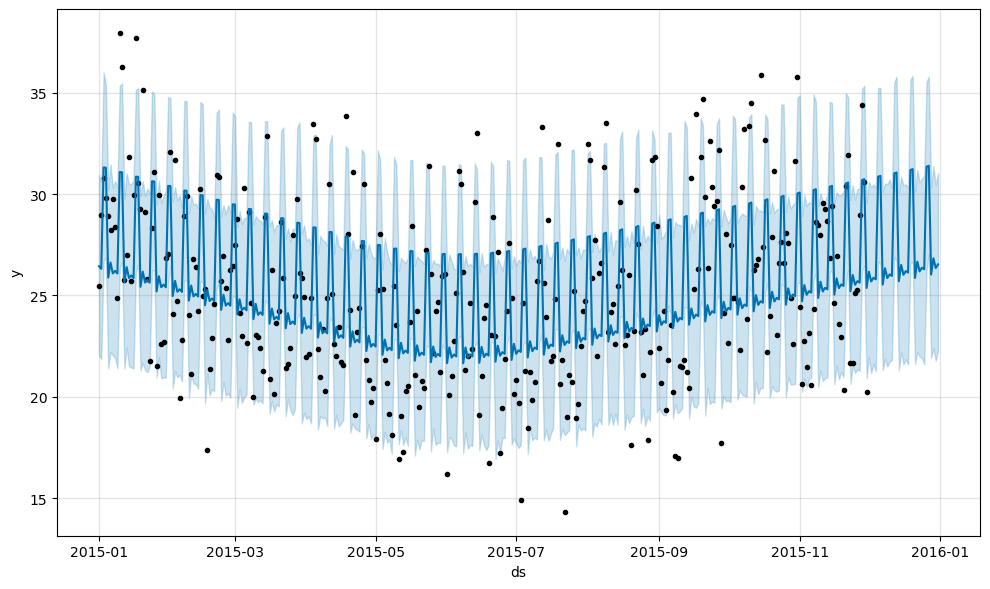

In [109]:
fig1 = m.plot(forecast)

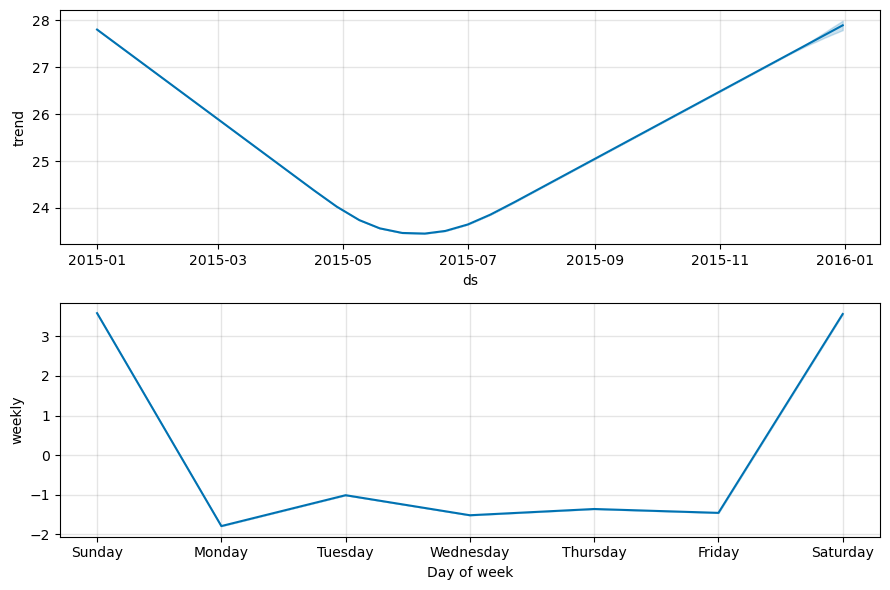

In [110]:
fig2 = m.plot_components(forecast)

14:33:46 - cmdstanpy - INFO - Chain [1] start processing


14:33:46 - cmdstanpy - INFO - Chain [1] done processing


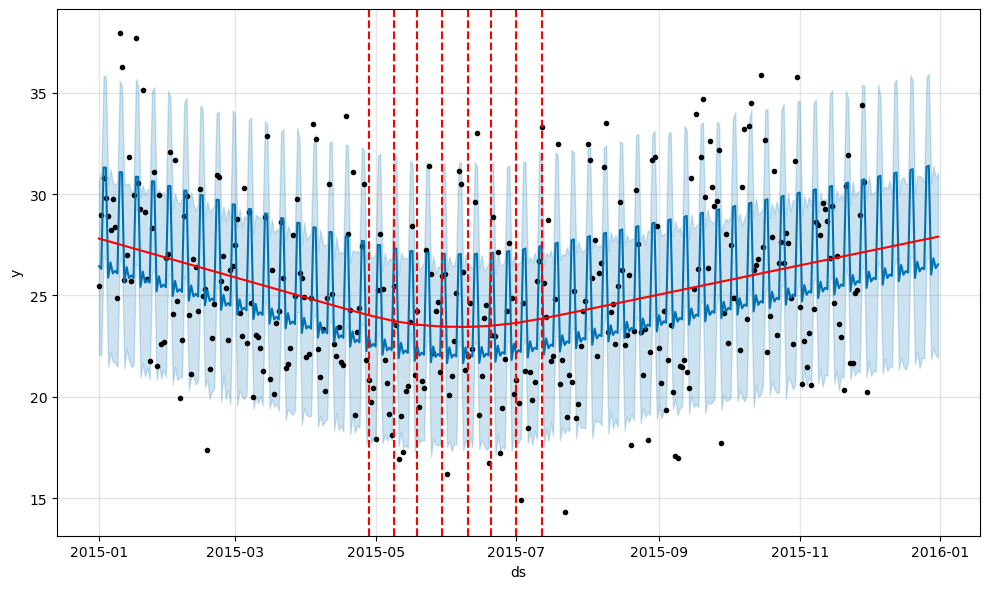

In [113]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_range=0.8)
m.fit(train)
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

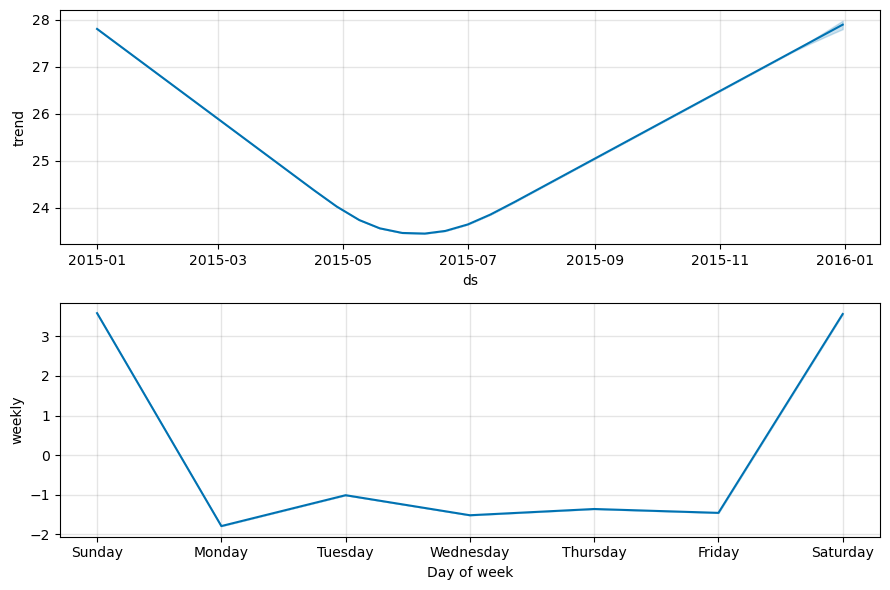

In [114]:
fig2 = m.plot_components(forecast)